# STATISTICAL RETHINKING WINTER 2019
## HOMEWORK, WEEK 1

## Globe toss experiment
Toss a globe ball so that the right index finger of the person who caches it touches a random spot. The sample proportion of the times that the finger touches water can be calculated  after a reasonable number of toeless, and this can be used to estimate the proportion of the entire earth that is covered by water.

### Example from Lecture
In the first example, the globe is tossed 9 times `n=9`, and landed on water 6 times `W=6`. We assume a flat prior `p=0.5`

In [32]:
from scipy.stats import binom
import numpy as np
import seaborn as sns
import pandas as pd
import altair as alt
alt.renderers.enable('default')
%config InlineBackend.figure_format = 'retina'


In [33]:
result = 'WLWWWLWLW'
# What is the probabilty of W=6/n=9 with p=0.5
p = 0.5
n = len(result)
w = sum(c=='W' for c in result) 
print(p, n, w)
binom.pmf(w, n, p)

0.5 9 6


0.16406250000000006

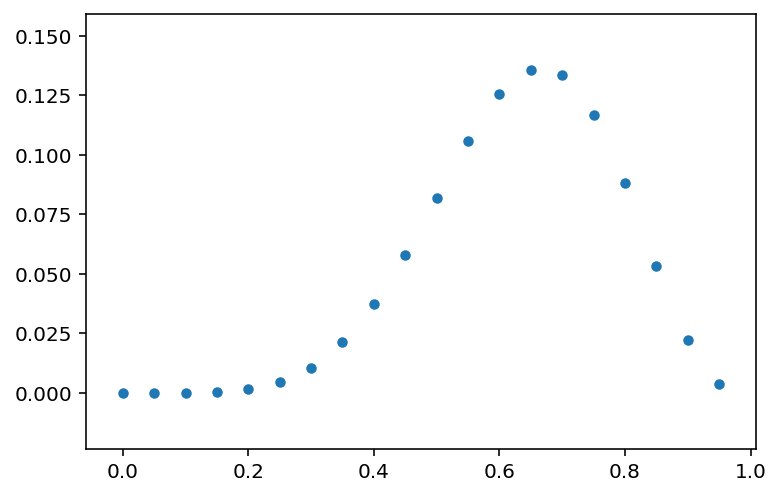

In [34]:
# define grid
p_grid = np.arange(0, 1, 0.05)
# define prior
prior = np.repeat(1, 20)
# compute likelihood at each value in grid 
likelihood = binom.pmf(w, n, p_grid)
# compute product of likelihood and prior 
unstd_posterior = likelihood * prior
# standardize the posterior, so it sums to 1 
posterior = unstd_posterior / sum(unstd_posterior)
sns.scatterplot(p_grid, posterior)

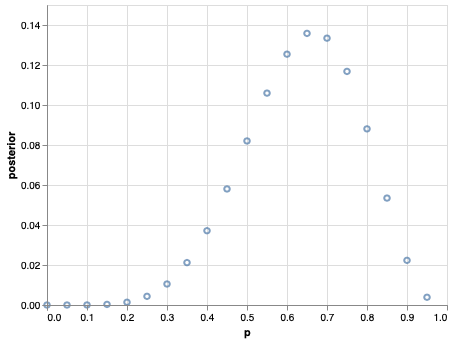

In [41]:
# using altair declarative library
data = pd.DataFrame({'p':p_grid, 'posterior':posterior})
alt.Chart(data).mark_point().encode(x='p', y='posterior', tooltip=['p','posterior'])

## Question 1
Suppose the globe tossing data had turned out to be 8 water in 15 tosses.
Construct the posterior distribution, using grid approximation. Use the
same flat prior as before.

In [11]:
def gridApproximate(w, n, num=20):
    # define grid
    p_grid = np.linspace(0, 1, num=num)
    # define prior
    prior = np.repeat(1, repeats=num)
    # compute likelihood at each value in grid 
    likelihood = binom.pmf(w, n, p_grid)
    # compute product of likelihood and prior 
    unstd_posterior = likelihood * prior
    # standardize the posterior, so it sums to 1 
    posterior = unstd_posterior / sum(unstd_posterior)
    return (p_grid, prior, posterior)

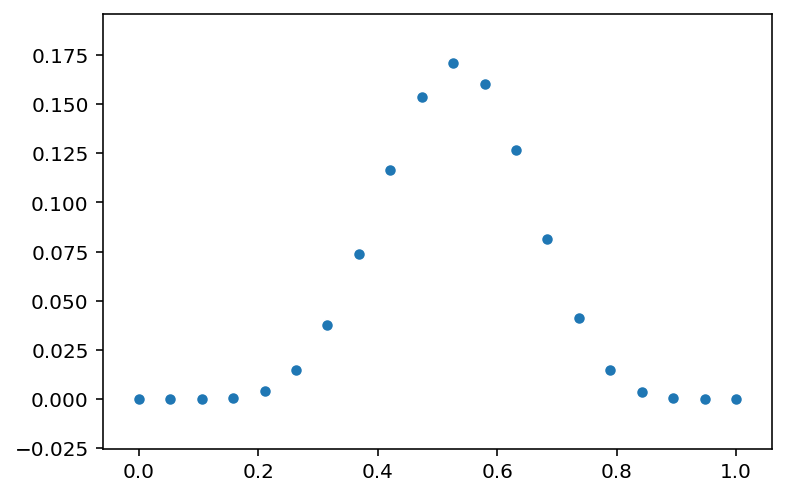

In [12]:
p_grid, prior, posterior = gridApproximate(8, 15)
sns.scatterplot(p_grid, posterior)

## Question 2
Start over in 1, but now use a prior that is zero below `p = 0.5` and a constant above `p = 0.5`. This corresponds to prior information that a majority of the Earth’s surface is water. What difference does the better prior make?
If it helps, compare posterior distributions (using both priors) to the true value `p = 0.7`.

In [13]:
def gridApproximate2(w, n, num=20, prior = None):
    # define grid
    p_grid = np.linspace(0, 1, num=num)
    # define prior
    prior = np.repeat(1, repeats=num) if prior == None else prior
    # compute likelihood at each value in grid 
    likelihood = binom.pmf(w, n, p_grid)
    # compute product of likelihood and prior 
    unstd_posterior = likelihood * prior
    # standardize the posterior, so it sums to 1 
    posterior = unstd_posterior / sum(unstd_posterior)
    return (p_grid, prior, posterior)

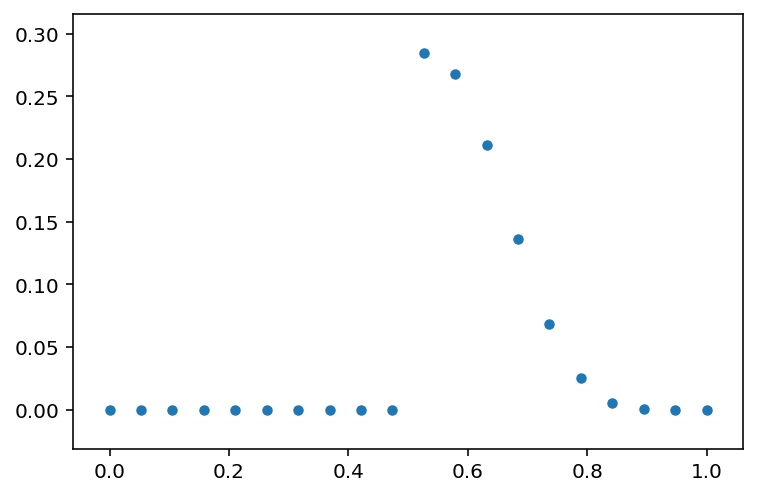

In [14]:
ps = np.linspace(0, 1, 20)
customPrior = [0 if p<0.5 else 1 for p in ps]
p_grid, prior, posterior = gridApproximate2(8, 15, prior=customPrior)
sns.scatterplot(p_grid, posterior)

## Question 3
Suppose you want to estimate the Earth’s proportion of water very precisely. Specifically, you want the 99% percentile interval of the posterior distribution of p to be only 0.05 wide. 

This means the distance between the upper and lower bound of the interval should be 0.05. How many times will you have to toss the globe to do this?

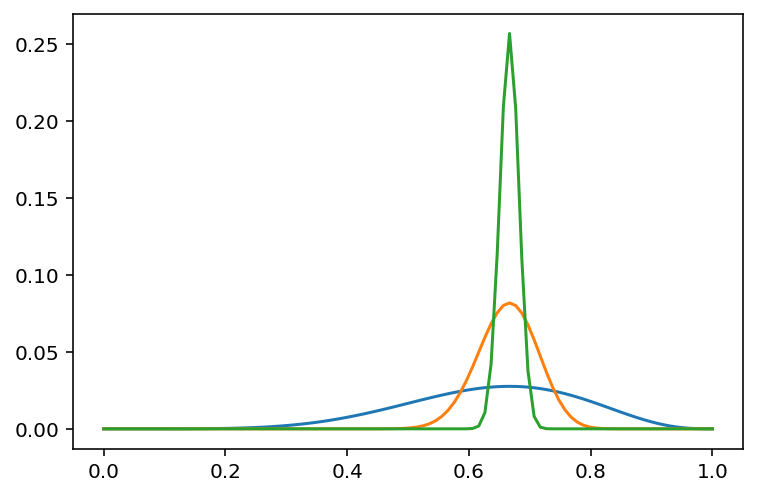

In [29]:
# to decrease the distance between the upper and lower bounds, we need a larger sample, 
# the script below starts with the initial sample 6/9, and then performs the sample
# calculation on multiple of 10. This increases the sample size while maintaining the same ratio

w = 6
n = 9
for i in [1, 10, 100]:
    p_grid, prior, posterior = gridApproximate(w*i,n*i, num=100)
    sns.lineplot(p_grid, posterior)


In [21]:
sns.lineplot?